In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#dataset Load the 
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [2]:
data = data[['v1', 'v2']]
data.columns = ['label', 'text']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [4]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [5]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



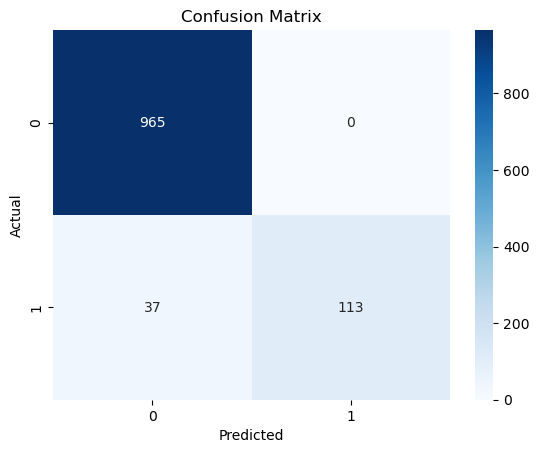

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
misclassified_examples = X_test[y_test != y_pred]
misclassified_actual_labels = y_test[y_test != y_pred]
misclassified_predicted_labels = y_pred[y_test != y_pred]

for i in range(min(5, len(misclassified_examples))):
    print("Predicted:", misclassified_predicted_labels[i])
    print("Actual:", misclassified_actual_labels.iloc[i])
    print("Message:", misclassified_examples.iloc[i])
    print()

Predicted: 0
Actual: 1
Message: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p

Predicted: 0
Actual: 1
Message: Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+

Predicted: 0
Actual: 1
Message: Loans for any purpose even if you have Bad Credit! Tenants Welcome. Call NoWorriesLoans.com on 08717111821

Predicted: 0
Actual: 1
Message: ringtoneking 84484

Predicted: 0
Actual: 1
Message: U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094594



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [15]:
text_data = data['v2']
labels = data['v1']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [16]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9757847533632287


In [17]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("AdaBoost Accuracy:", accuracy_ab)

AdaBoost Accuracy: 0.967713004484305


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

# Preprocessing
text_data = data['v2']
labels = data['v1']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [21]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [22]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

In [23]:
print("Random Forest Accuracy:", accuracy_rf)
print("AdaBoost Accuracy:", accuracy_ab)

Random Forest Accuracy: 0.9757847533632287
AdaBoost Accuracy: 0.967713004484305


In [24]:
if accuracy_rf > accuracy_ab:
    print("Random Forest performs better.")
elif accuracy_ab > accuracy_rf:
    print("AdaBoost performs better.")
else:
    print("Both methods have the same accuracy.")

Random Forest performs better.


In [26]:
Text=data.v2
Text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [27]:
Target=data.v1
Target

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [28]:
Target.replace('spam',1,inplace=True)
Target.replace('ham',0,inplace=True)
Target

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [29]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
3245,ham,0
944,ham,0
1044,spam,0
2484,ham,0
812,spam,1
...,...,...
4264,ham,0
2439,ham,0
5556,ham,0
4205,ham,0
